In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn import under_sampling

from warnings import filterwarnings

filterwarnings('ignore')

In [3]:
train = pd.read_csv('train_processed.csv')

In [4]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0,21,1,35,0,1,65101,124,187,0,0,0
1,0,43,1,28,0,1,58911,26,288,1,0,1
2,1,25,1,14,1,0,38043,152,254,0,1,0
3,1,35,1,1,0,1,2630,156,76,0,0,0
4,1,36,1,15,1,0,31951,152,294,0,0,0


In [17]:
sample = train.sample(10000)

In [18]:
under = under_sampling.RandomUnderSampler()
x1, x2 = under.fit_resample(sample.drop(['Response'], axis=1), sample['Response'])
sample = pd.concat((x1, x2), axis=1)

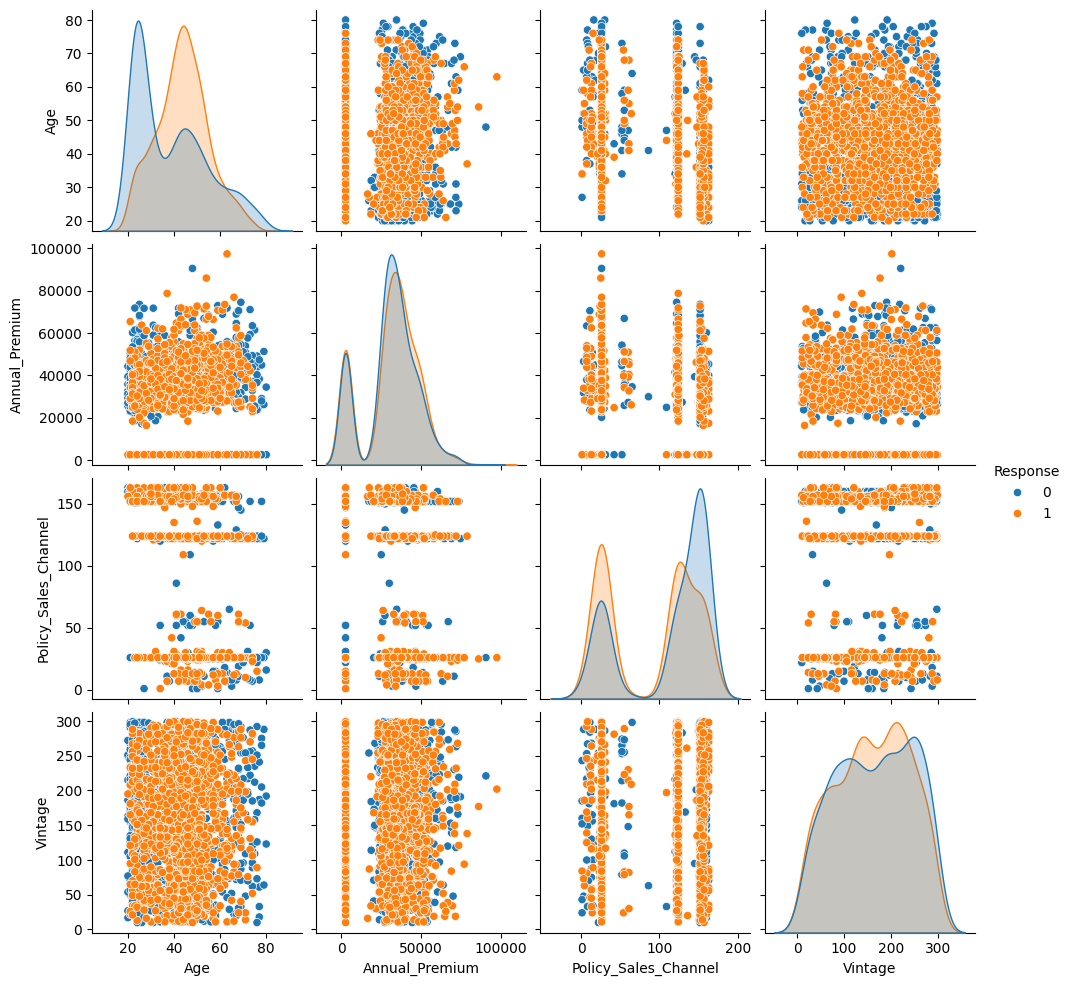

In [19]:
sns.pairplot(sample[['Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']], hue='Response')
plt.show()


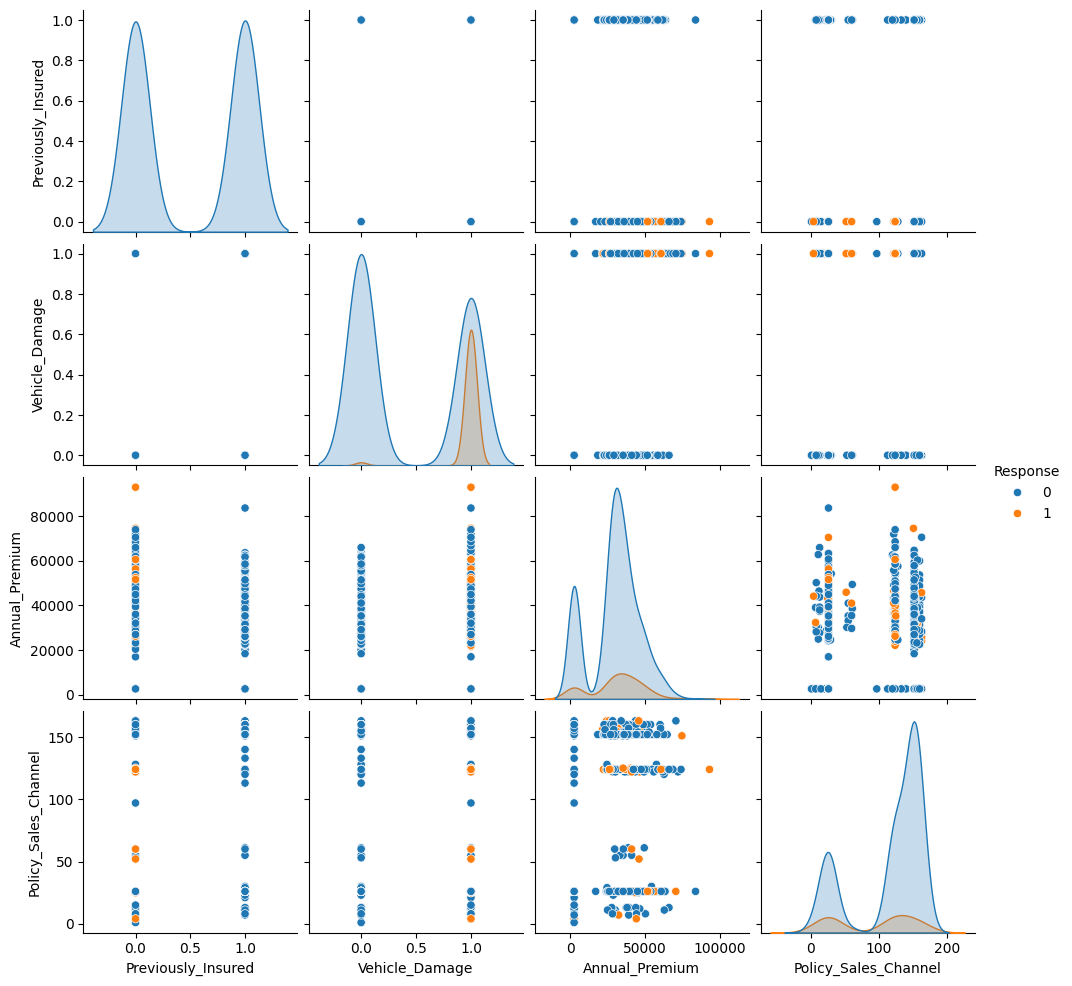

In [13]:
sns.pairplot(sample[['Previously_Insured','Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Response']], hue='Response')
plt.show()

In [20]:
from sklearn.decomposition import PCA

In [36]:
smp = PCA(n_components=2).fit_transform(sample.drop(['Response'], axis=1))

In [37]:
smp = pd.concat((pd.DataFrame(smp), sample.Response.reset_index(drop=True)), axis=1)
smp.columns = ['1', '2', 'Response']

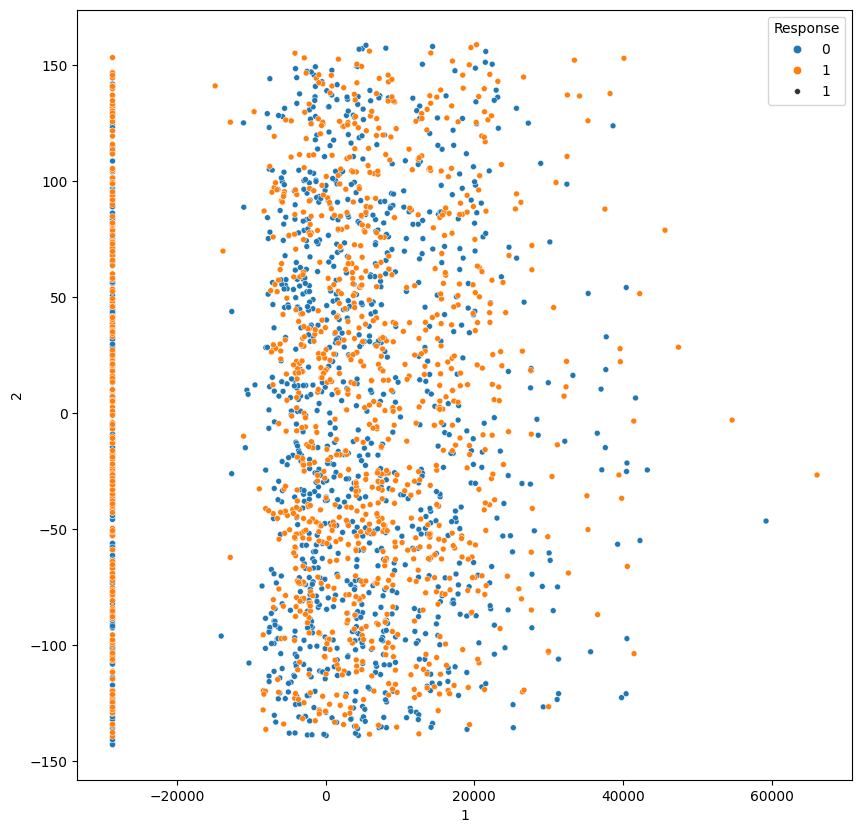

In [40]:
plt.figure(figsize=(10, 10))
sns.scatterplot(smp, x='1', y='2', hue='Response', size=1)
plt.show()